# Проверка гипотезы для реальных данных

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math
import time

In [2]:
def log_dog(year, file): #функция для вывода логдоходностей компании за один год
    df1 = pd.read_csv(file, sep=';', encoding='cp1251') #считываем csv файл
    condition = (df1['<DATE>']>= year*10000) & (df1['<DATE>'] < (year+1)*10000) #условие для одного года
    df = df1[condition]['<CLOSE>'] #отбираются цены закрытия для данного года
    df = pd.DataFrame.diff(np.log(df1[condition]['<CLOSE>']))[1::] #подсчет логдохоности
    return df #Возвращает таблицу лог_дохоностей

def p_value(lg): #Функция для расчета p-value
    p_sp = list()
    p_sp.append(round(st.shapiro(lg)[1], 5)) #Шапиро-Уилка
    p_sp.append(round(st.normaltest(lg)[1], 5)) #Агадино
    return p_sp

def dol(p_val): #количество значений, которые принимаются с разными уровнями значимости 0.01 и 0.05
    k_05 = 0
    k_01 = 0
    for i in p_val:
        if i >= 0.05:
            k_05 += 1
            k_01 += 1
        elif i >= 0.01:
            k_01 += 1
    return [k_05, k_01]

def pv_hist(pv, text = 'Шапиро-Уилка'): #Функция для построения Гитсрограммы p-value
    kolint=(math.log2(len(pv)))//1+1
    plt.title('Гистограмма P-значений критерия ' + text + ' для реальных данных')
    plt.hist(pv, bins=int(kolint), color='b', alpha=0.65)
    plt.savefig(u"C:/Users/Андрюша/Desktop/Акции_Курсовая/Гистограмма P-значений " + text + " для реальных данных.png")

def med(tabl, n): #Функция для расчета медианы по каждому тикеру за весь период 
    m = list() #список медиан для всех компаний 
    for i in range(n):
        m.append(np.median(tabl.iloc[i]))
    m.append("---") #заполняем заключительную строку, так как медиана от медиан по годам НЕ НУЖНА!
    return m

In [3]:
start = time.time()

tickers = ['AAPL', 'AXP', 'BA', 'CAT', 'IBM', 'INTC', 'KO', 'MSFT', 'XOM']

ind = ['AAPL', 'AXP', 'BA', 'CAT', 'IBM', 'INTC', 'KO', 'MSFT', 'XOM']
ind.append('Медиана')

table_sh = pd.DataFrame(index = ind)
table_k = pd.DataFrame(index = ind)

k_sh = [[], []] #список количества принимаемых p-value для критерия Шапиро-Уилка по годам для разных уровней значимости
k_k = [[], []] #список количества принимаемых p-value для критерия Агадино по годам для разных уровней значимости

p_vse = [[], []] #Список p-value для каждого критерия по всем тикерам за весь период

for year in range(2010, 2021): 
    p = [[], []] #список значений p-value
    for ticker in tickers:
        f = open(u'C:/Users/Андрюша/Desktop/Акции_курсовая/' + ticker + '.csv') #открываем файл
        l_g = log_dog(year, file = f) #добавляем в список
        
        p[0].append(p_value(l_g)[0]) #значение p-value для Шапиро-Уилка
        p[1].append(p_value(l_g)[1]) #значение p-value для Агадино
        
        p_vse[0].append(p_value(l_g)[0])
        p_vse[1].append(p_value(l_g)[1])
        
        
    k_sh[0].append(dol(p[0])[0])
    k_sh[1].append(dol(p[0])[1])
    
    k_k[0].append(dol(p[1])[0])
    k_k[1].append(dol(p[1])[1])
    
    p[0].append(np.median(p[0])) #Вычисляем медиану 
    table_sh[str(year)] = p[0]
    
    p[1].append(np.median(p[1])) #Вычисляем медиану 
    table_k[str(year)] = p[1]
    
table_sh['Медиана'] = med(table_sh, len(tickers))
table_k['Медиана'] = med(table_k, len(tickers))

table_sh.to_excel(u'C:/Users/Андрюша/Desktop/Акции_Курсовая/P-значения_Шапиро_Улка.xlsx', index = True,  encoding = 'cp1251')
table_k.to_excel(u'C:/Users/Андрюша/Desktop/Акции_Курсовая/P-значения_Агостино.xlsx', index = True,  encoding = 'cp1251')

print("Примерное время выполнения = {}".format(time.time() - start))

Примерное время выполнения = 10.951950550079346


In [4]:
table_sh #Таблица Шапиро-Уилка

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Медиана
AAPL,0.00066,0.00012,0.00000,0.00000,0.00000,0.07212,0.00000,0.00000,0.00003,0.00000,0.00536,0
AXP,0.19641,0.00000,0.58363,0.00733,0.00343,0.00000,0.00000,0.00000,0.00000,0.00010,0.00018,0.0001
BA,0.19442,0.00000,0.00002,0.03735,0.00012,0.00000,0.00000,0.00000,0.04371,0.00011,0.00002,2e-05
CAT,0.01175,0.00157,0.24771,0.00000,0.00000,0.00000,0.00015,0.00000,0.00078,0.00000,0.03668,0.00015
IBM,0.00294,0.00006,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.09475,0
INTC,0.12157,0.01139,0.09702,0.00000,0.00000,0.00468,0.00000,0.00000,0.00009,0.00000,0.00047,9e-05
KO,0.00007,0.01398,0.00000,0.00000,0.00000,0.00533,0.00000,0.00004,0.00013,0.00000,0.00774,4e-05
MSFT,0.01176,0.00002,0.00071,0.00000,0.00254,0.00000,0.00000,0.00000,0.00000,0.00103,0.00123,2e-05
XOM,0.01465,0.00000,0.00026,0.07665,0.00001,0.00005,0.00000,0.01657,0.00018,0.18932,0.01221,0.00026
Медиана,0.01176,0.00006,0.00026,0.00000,0.00000,0.00000,0.00000,0.00000,0.00009,0.00000,0.00536,---


In [5]:
table_k #Таблица Агадино

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Медиана
AAPL,0.00030,0.00000,0.00000,0.00000,0.00000,0.08629,0.00000,0.00000,0.00059,0.00000,0.02538,0
AXP,0.27261,0.00000,0.12813,0.00256,0.04429,0.00000,0.00000,0.00000,0.00000,0.00048,0.00240,0.00048
BA,0.11605,0.00000,0.00001,0.01301,0.00000,0.00000,0.00000,0.00000,0.04583,0.00024,0.00965,1e-05
CAT,0.04877,0.00002,0.19487,0.00000,0.00000,0.00000,0.00016,0.00000,0.00005,0.00000,0.00480,2e-05
IBM,0.00749,0.00013,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.05586,0
INTC,0.06004,0.00210,0.22451,0.00000,0.00000,0.00051,0.00000,0.00000,0.00003,0.00000,0.00175,3e-05
KO,0.01139,0.02508,0.00000,0.00000,0.00000,0.00067,0.00000,0.00001,0.00000,0.00000,0.04849,0
MSFT,0.02777,0.00000,0.00004,0.00000,0.01508,0.00000,0.00000,0.00000,0.00009,0.00415,0.00318,4e-05
XOM,0.06910,0.00000,0.00007,0.03168,0.00000,0.00170,0.00001,0.26719,0.00000,0.10373,0.08144,0.0017
Медиана,0.04877,0.00000,0.00004,0.00000,0.00000,0.00000,0.00000,0.00000,0.00003,0.00000,0.00965,---


In [6]:
dly_SHAPIR = pd.DataFrame(index = ['Доля']) #Таблица долей принятия гипотезы H0 для Шапиро-Уилка
dly_SHAPIR['уровень значимости 5%'] = sum(k_sh[0])/(len(range(2010, 2021))*len(tickers))
dly_SHAPIR['уровень значимости 1%'] = sum(k_sh[1])/(len(range(2010, 2021))*len(tickers))
dly_SHAPIR #Таблица долей принятия гипотезы H0 для Шапиро-Уилка

,уровень значимости 5%,уровень значимости 1%
Доля,0.10101,0.20202


In [7]:
dly_AGAD = pd.DataFrame(index = ['Доля']) #Таблица долей принятия гипотезы H0 для Агадино
dly_AGAD['уровень значимости 5%'] = sum(k_k[0])/(len(range(2010, 2021))*len(tickers))
dly_AGAD['уровень значимости 1%'] = sum(k_k[1])/(len(range(2010, 2021))*len(tickers))
dly_AGAD #Таблица долей принятия гипотезы H0 для Агадино

,уровень значимости 5%,уровень значимости 1%
Доля,0.121212,0.232323


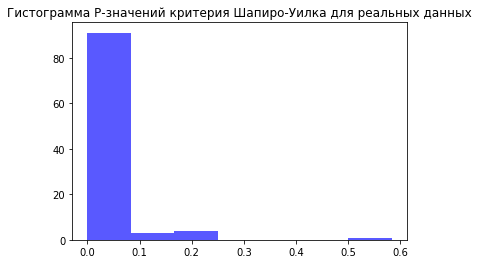

In [8]:
pv_hist(p_vse[0]) #Строим гистограмму для критерия Шапиро-Уилка

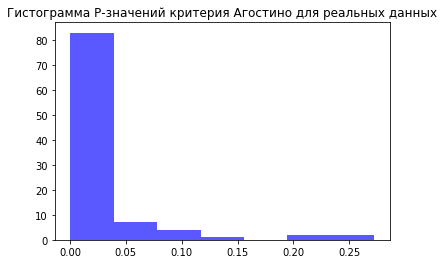

In [9]:
pv_hist(p_vse[1], text = "Агостино") #Строим гистограмму для критерия Агадино